# Membuat Regression Dengan Diabetes Datasets
___

#### Github [AgungYogaSetiawan](https://github.com/AgungYogaSetiawan)

## 1. Import library

In [34]:
from sklearn import datasets # library dari scikit-learn yang berisi dataset dari sklearn(toy datasets)
from sklearn.ensemble import RandomForestRegressor # model algoritma supervised dengan metode RandomForestRegressor 
from sklearn.model_selection import train_test_split # untuk split/membagi training dan testing data
import pandas as pd # library dalam menganalisa data, manipulasi data, dll
import pickle 
import matplotlib.pyplot as plt # library untuk memvisualkan data

## 2. Load datasets
---
Dalam library sklearn datasets, ada beberapa datasets yang kita bisa pakai. Kita akan memakai dataset diabetes

In [19]:
diabetes = datasets.load_diabetes(as_frame=True)

In [20]:
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

## 3. Show data dan target diabetes

In [21]:
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [22]:
diabetes.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [23]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

## 4. Show feature_names diabetes

In [24]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## 5. Bagi data dan target assign ke variabel X dan y

In [25]:
X = diabetes.data
y = diabetes.target

In [26]:
print(f'Shape X: {X.shape}')
print(f'Shape y: {y.shape}')

Shape X: (442, 10)
Shape y: (442,)


## 6. Simple EDA data diabetes

#### Info data

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


#### cek missing value

In [32]:
X.isna().any()

age    False
sex    False
bmi    False
bp     False
s1     False
s2     False
s3     False
s4     False
s5     False
s6     False
dtype: bool

#### cek duplikat data

In [33]:
X[X.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6


#### cek apakah ada nilai 0

In [38]:
for col in X.columns:
    print(f'number of rows missing of {col}: {len(X.loc[X[col] == 0])}')

number of rows missing of age: 0
number of rows missing of sex: 0
number of rows missing of bmi: 0
number of rows missing of bp: 0
number of rows missing of s1: 0
number of rows missing of s2: 0
number of rows missing of s3: 0
number of rows missing of s4: 0
number of rows missing of s5: 0
number of rows missing of s6: 0


### describe data

In [40]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


### correlation data

In [41]:
X.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


## 7. Konfigurasi Model

In [42]:
rfr = RandomForestRegressor(n_estimators=100,random_state=1)

## 8. Latih model dan predict model

In [43]:
rfr.fit(X,y)

RandomForestRegressor(random_state=1)

In [49]:
y_pred = rfr.predict(X)

In [51]:
print(y.head())

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


### cek `mean_absolute_error`

In [55]:
from sklearn.metrics import mean_absolute_error

In [61]:
mae1 = mean_absolute_error(y,y_pred)

In [62]:
mae1

17.308733031674205

## Bagi menjadi training dan testing data

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [60]:
print(f'Shape X_train: {X_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (309, 10)
Shape X_test: (133, 10)
Shape y_train: (309,)
Shape y_test: (133,)


In [63]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [64]:
y_pred = rfr.predict(X_test)

In [65]:
mae2 = mean_absolute_error(y_test,y_pred)

In [66]:
mae2

47.665187969924816

## Visualisasi hasil mae

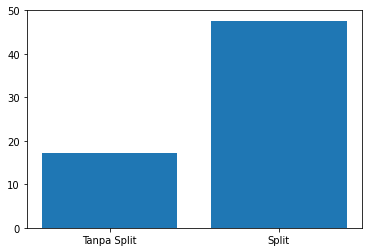

In [74]:
maes = [mae1,mae2]
plt.bar(['Tanpa Split','Split'],maes)
plt.ylim(0,50)
plt.show()